# Praktikum

Dalam bab ini, praktikan diharapkan memahami implementasi model ELM. Praktikan harus mampu membangun model ELM dan Backpropagation, serta melakukan analisis dan perbandingan hasil dari kedua model tersebut.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

Dataset yang digunakan adalah dataset MNIST yang memiliki 28x28 piksel gambar dan 10 label kelas.

In [30]:
!gdown 1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA

Downloading...
From: https://drive.google.com/uc?id=1C21YHSaGWJjqj85zCDckCPeBtJwI7aWA
To: /content/data.csv
100% 18.3M/18.3M [00:00<00:00, 206MB/s]


In [31]:
df = pd.read_csv('data.csv')
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:

data = df[(df['label'] == 5) | (df['label'] == 6)]
data.reset_index(drop=True, inplace=True)

<ipython-input-33-643402e0e743>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kelas = row[0]


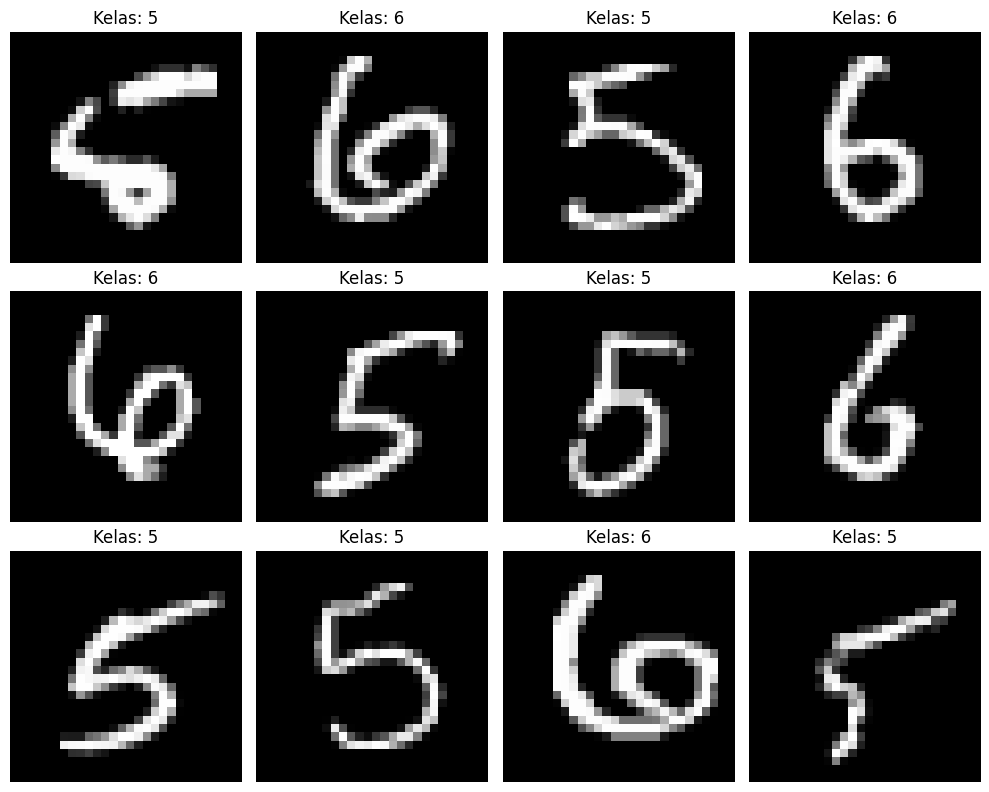

In [33]:
selected = data.iloc[:12]
baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(10, 8))

for index, row in selected.iterrows():
    kelas = row[0]
    nilai_piksel = row[1:].values.astype(int)

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index // kolom
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')
    axes[baris_subplot, kolom_subplot].axis('off')

plt.tight_layout()
plt.show()

### Fungsi *Training* ELM

Lengkapi kode dalam cell di bawah ini:

In [34]:
import numpy as np
import time

def elm_fit(X, target, h, W=None):
    start_time = time.time()

    if W is None:
        W = np.random.rand(X.shape[1], h)

    Hinit = np.dot(X, W)
    H = np.tanh(Hinit)

    Ht = H.T
    Hp = np.linalg.pinv(Ht @ H) @ Ht

    beta = Hp @ target
    y = H @ beta
    mse = np.mean((y - target) ** 2)

    execution = time.time() - start_time
    print("Waktu eksekusi: %s detik" % execution)

    return W, beta, mse


### Fungsi *Testing* ELM

Lengkapi kode dalam cell di bawah ini:

In [35]:
def elm_predict(X, W, b, round_output=False):
    Hinit = np.dot(X, W)
    H = np.tanh(Hinit)


    y = H @ b


    if round_output:
        y = np.round(y).astype(int)


    return y

### Implementasi Model ELM
Lengkapi kode dalam cell di bawah ini:

Ubahlah nilai pengaturan sebagai berikut:

a. Rasio data latih: 75% dan data uji: 25%

b. Jumlah hidden neuron: 10

In [36]:
X = minmax_scale(data.drop('label', axis=1).astype('float32'))
Y = data['label'].astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)


W, b, mse = elm_fit(X_train, y_train, h=10)
print('MSE:', mse)


output = elm_predict(X_test, W, b, round_output=True)


accuracy = accuracy_score(output, y_test)
print('Output:', output)
print('True   :', y_test)
print('Accuracy:', accuracy)


Waktu eksekusi: 0.0072286128997802734 detik
MSE: 0.24991877922985592
Output: [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 

### Fungsi *Training* Backpropagation


In [37]:
import numpy as np

def sig(x):
    return 1 / (1 + np.exp(-x))

def sigd(x):
    s = sig(x)
    return s * (1 - s)

def onehot_enc(lbl, min_val=0):
    mi = min(lbl)
    enc = np.zeros((len(lbl), max(lbl) - mi + 1))
    for i, x in enumerate(lbl):
        enc[i, x - mi] = 1
    return enc

def onehot_dec(enc, mi=0):
    return [np.argmax(e) + mi for e in enc]


In [38]:
import time

def bp_fit(X, target, layer_conf, max_epoch, max_error=0.1, learn_rate=0.1, print_per_epoch=100):
    start_time = time.time()
    np.random.seed(1)

    n = [np.empty(layer_conf[i] + 1) if i < len(layer_conf) - 1 else np.empty(layer_conf[i])
         for i in range(len(layer_conf))]
    w = [np.random.rand(layer_conf[i] + 1, layer_conf[i+1]) for i in range(len(layer_conf) - 1)]
    dw = [np.zeros_like(w[i]) for i in range(len(w))]
    d = [np.empty(layer_conf[i+1]) for i in range(len(layer_conf) - 1)]
    nin = [np.empty(layer_conf[i+1]) for i in range(len(layer_conf) - 1)]
    epoch = 0
    mse = 1

    for i in range(len(n) - 1):
        n[i][-1] = 1

    while (max_epoch == -1 or epoch < max_epoch) and mse > max_error:
        epoch += 1
        mse = 0

        for r in range(len(X)):
            n[0][:-1] = X[r]
            n[0][-1] = 1

            for L in range(1, len(layer_conf)):
                nin[L-1] = np.dot(n[L-1], w[L-1])
                if L < len(layer_conf) - 1:
                    n[L][:-1] = sig(nin[L-1])
                    n[L][-1] = 1
                else:
                    n[L] = sig(nin[L-1])

            e = target[r] - n[-1]
            mse += np.sum(e ** 2)

            d[-1] = e * sigd(nin[-1])
            dw[-1] = learn_rate * np.outer(n[-2], d[-1])

            for L in range(len(layer_conf) - 2, 0, -1):
                d[L-1] = (np.dot(d[L], w[L][:-1].T)) * sigd(nin[L-1])
                dw[L-1] = learn_rate * np.outer(n[L-1], d[L-1])

            for i in range(len(w)):
                w[i] += dw[i]

        mse /= len(X)

        if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, MSE: {mse}')

    execution = time.time() - start_time
    print(f"Waktu eksekusi: {execution:.4f} detik")

    return w, epoch, mse


### b) Fungsi *Testing* Backpropagation


In [39]:
def bp_predict(X, w):
    num_layers = len(w) + 1
    layer_conf = [w[0].shape[0] - 1]
    for i in range(len(w)):
        layer_conf.append(w[i].shape[1])

    n = []
    for i in range(num_layers):
        if i < num_layers - 1:
            n.append(np.empty(layer_conf[i] + 1))
        else:
            n.append(np.empty(layer_conf[i]))

    predict = []

    for x in X:
        n[0][:-1] = x
        n[0][-1] = 1

        for L in range(len(w)):
            nin_L = np.dot(n[L], w[L])
            if L < len(w) - 1:
                n[L + 1][:-1] = sig(nin_L)
                n[L + 1][-1] = 1
            else:
                n[L + 1] = sig(nin_L)

        predict.append(n[-1].copy())

    return predict


### Implementasi Model Backpropagation
Lengkapi kode dalam cell di bawah ini:
Ubahlah nilai pengaturan sebagai berikut:

a. Rasio data latih: 75% dan data uji: 25%

b. Jumlah hidden neuron: 10

c. Max epoch = 100

d. Learning rate = 0.1

e. Max error = 0.5

In [41]:

hidden_neurons = 10
max_epoch = 100
learning_rate = 0.1
max_error = 0.5
train_ratio = 0.75

x = minmax_scale(data.drop('label', axis=1).astype('float32'))
y = data['label'].astype('int')

X = x
Y = onehot_enc(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio, random_state=42)

layer_conf = (784, hidden_neurons, 2)
w, ep, mse = bp_fit(
    X_train, y_train,
    layer_conf=layer_conf,
    learn_rate=learning_rate,
    max_epoch=max_epoch,
    max_error=max_error,
    print_per_epoch=25
)


predict = bp_predict(X_test, w)
predict = onehot_dec(predict)
y_test_decoded = onehot_dec(y_test)


accuracy = accuracy_score(predict, y_test_decoded)


print('Epochs:', ep)
print('MSE:', mse)
print('Output:', predict)
print('True :', y_test_decoded)
print('Accuracy:', accuracy)


Epoch 25, MSE: 0.5172361278406471
Epoch 50, MSE: 0.5172361278406374
Epoch 75, MSE: 0.5172361278406274
Epoch 100, MSE: 0.5172361278406177
Waktu eksekusi: 15.6866 detik
Epochs: 100
MSE: 0.5172361278406177
Output: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Pertanyaan
1. Jelaskan proses membagi data menjadi set pelatihan dan pengujian untuk pelatihan . Mengapa langkah ini diperlukan?
2. Bagaimana proses penyesuaian bobot dilakukan dalam Extreme Learning Machine (ELM) dibandingkan dengan algoritma Backpropagation?
3. Bagaimana perbandingan dari hasil dua model diatas? Jelaskan perbedaan, kelebihan, dan kekurangan berdasarkan hasil yang diterima!

Jawaban

1. Proses ini melibatkan pemisahan data menjadi dua bagian: set pelatihan untuk melatih model dan set pengujian untuk mengevaluasi kinerja model. Biasanya, sekitar 70-80% data digunakan untuk pelatihan dan sisanya untuk pengujian.

2. Pada Extreme Learning Machine (ELM), bobot antara input dan hidden layer diatur secara acak dan tidak diubah selama pelatihan. Hanya bobot keluaran yang dihitung menggunakan metode matematika seperti pseudo-invers, membuat prosesnya sangat cepat. Sebaliknya, Backpropagation menyesuaikan bobot secara iteratif di semua lapisan menggunakan perhitungan gradien berdasarkan error, yang memerlukan waktu lebih lama tetapi biasanya menghasilkan model yang lebih akurat.
3. ELM menawarkan kecepatan pelatihan yang tinggi dan implementasi yang sederhana, cocok untuk dataset yang tidak terlalu kompleks. Namun, ELM bisa kurang akurat pada data yang rumit dan sensitif terhadap pemilihan bobot awal. Di sisi lain, Backpropagation lebih lambat karena proses iteratifnya, tetapi mampu mencapai akurasi yang lebih tinggi dan generalisasi yang lebih baik pada dataset yang kompleks.